In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
145,8924,0.00028,0.00879,14.87,2,Blue-White,A
110,3459,100000.00000,1289.00000,-10.70,5,Red,M
133,2989,0.00870,0.34000,13.12,1,Red,M
89,19860,0.00110,0.01310,11.34,2,Blue,B
114,3610,132000.00000,1522.00000,-10.86,5,Red,M
28,11790,0.00015,0.01100,12.59,2,Yellow-White,F
63,2835,0.00034,0.09180,16.96,0,Red,M
3,2800,0.00020,0.16000,16.65,0,Red,M
99,36108,198000.00000,10.20000,-4.40,3,Blue,O
35,8052,8.70000,1.80000,2.42,3,White,A


In [31]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [32]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'./{folder_name}/'


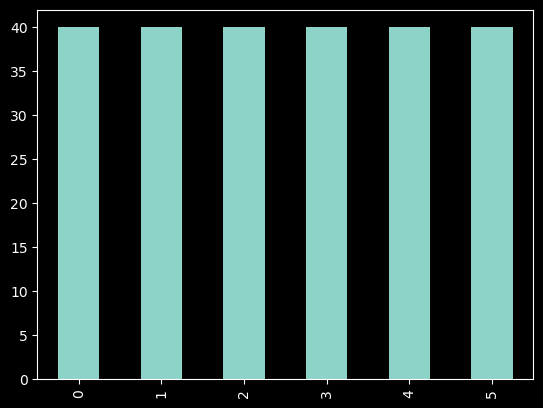

In [33]:
# Bar chart to visualize the count of stars with respective type
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

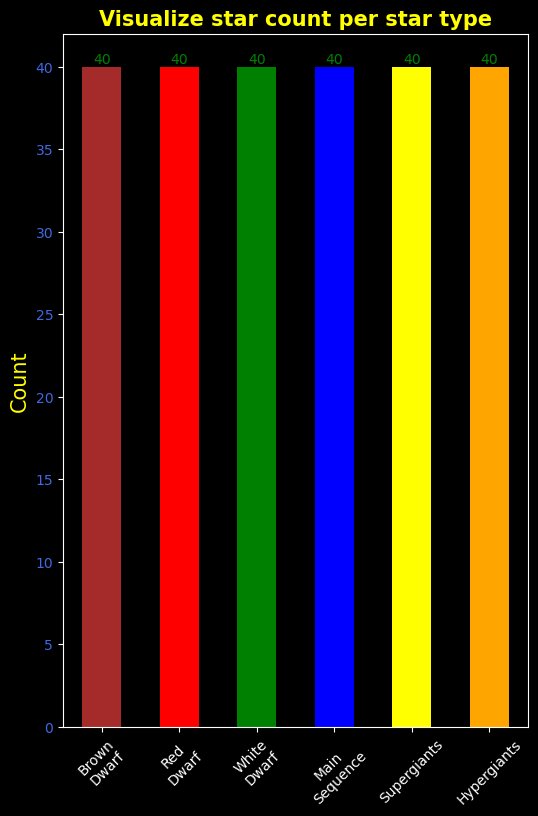

In [34]:
star_types = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence','Supergiants','Hypergiants']
plt.figure(figsize=(6,9))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown','red','green','blue','yellow','orange'])
ax.bar_label(ax.containers[0], color='green')
plt.title('Visualize star count per star type', fontsize=15, color='yellow', weight='bold')
plt.yticks(color='royalblue')
plt.ylabel('Count', fontsize=15,color='yellow')
plt.xticks(ticks=[0,1,2,3,4,5],labels=star_types, rotation=45,fontsize=10)
plt.savefig(base_dir+'barplot_star_counts.png')
plt.show()



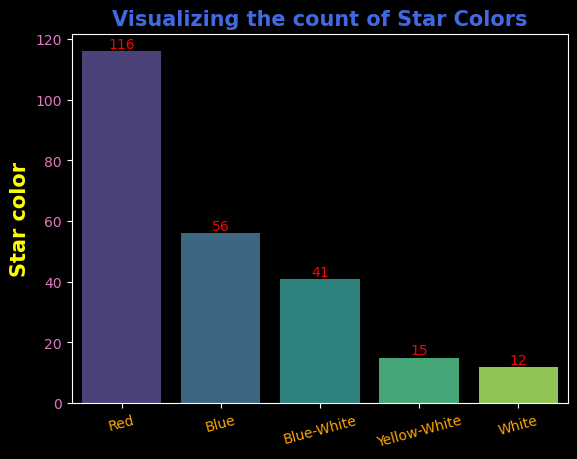

In [57]:
# Bar chart but with Seaborn + Matplotlib
x=star_df['Star color'].value_counts().index
y=star_df['Star color'].value_counts()
ax = sns.barplot(x=x, y=y, palette='viridis')
#,palette='viridis',hue=x,legend=False
for container in ax.containers:
    ax.bar_label(container, color='red')
    
plt.title("Visualizing the count of Star Colors",
          color="royalblue",
          fontsize=15,
          weight='bold')
plt.xticks(rotation=15,color='orange')
plt.ylabel('Star color',color='yellow', weight='bold', fontsize=15)
plt.yticks(color='tab:pink')
# plt.savefig(base_dir + 'star_colors.png')
plt.show()

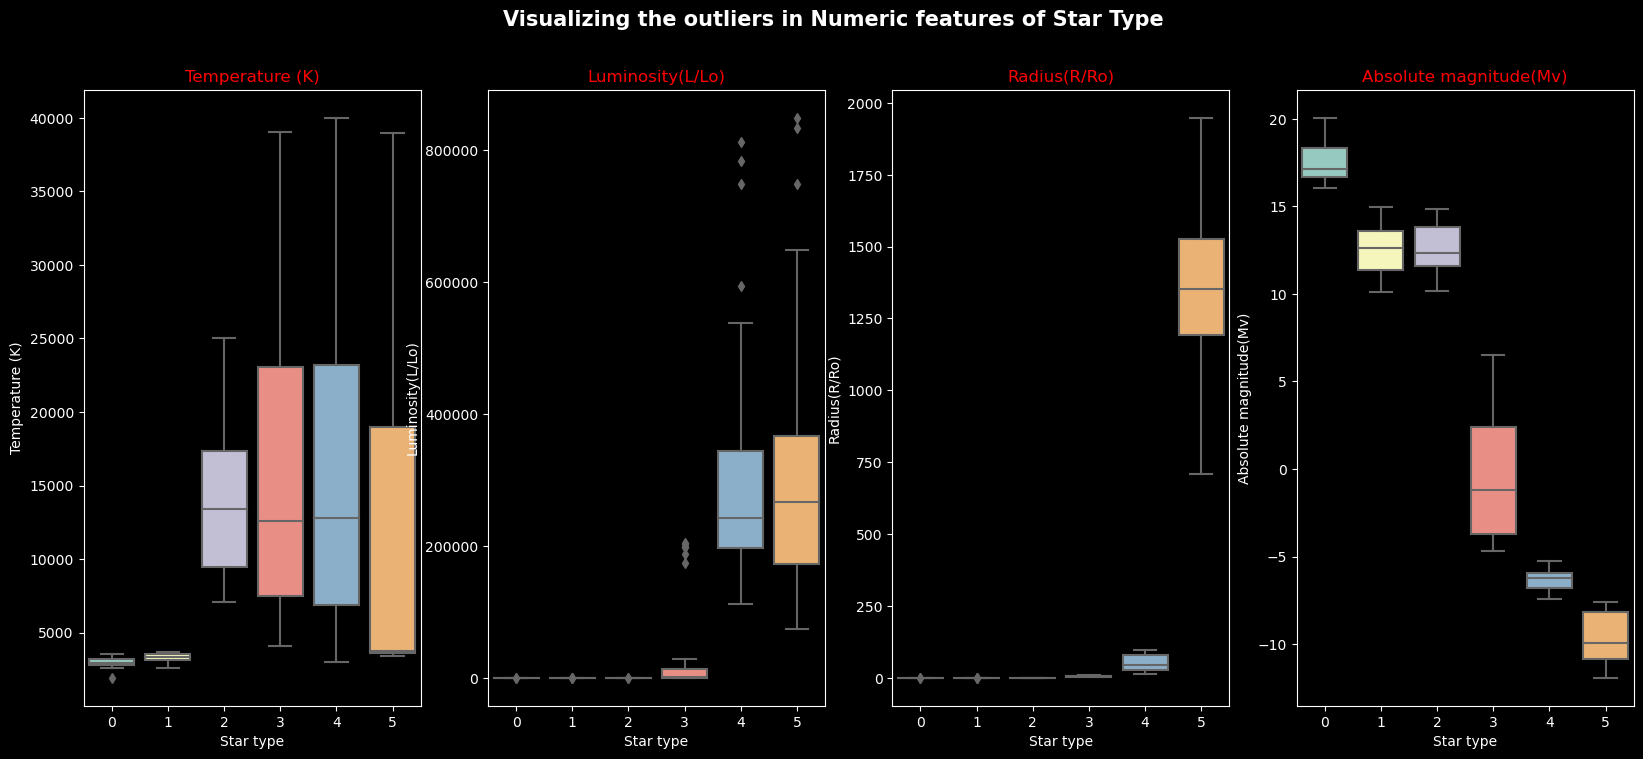

In [56]:
# boxplot
plt.figure(figsize=(20,8))
plt.suptitle('Visualizing the outliers in Numeric features of Star Type', color='white',weight='bold',fontsize='15')
plt.style.use('dark_background')
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:,i])
    plt.title(star_df.columns[i], color='red')
plt.savefig(base_dir + 'boxplot_star_type.png')

In [ ]:
def line_subplot(star_df, colors, i):
    plt.subplot(4,1,i+1)
    plt.plot(star_df.iloc[:,i], color=colors[i])
    plt.title(star_df.columns[i], color='lightblue', fontsize=10, weight='bold')

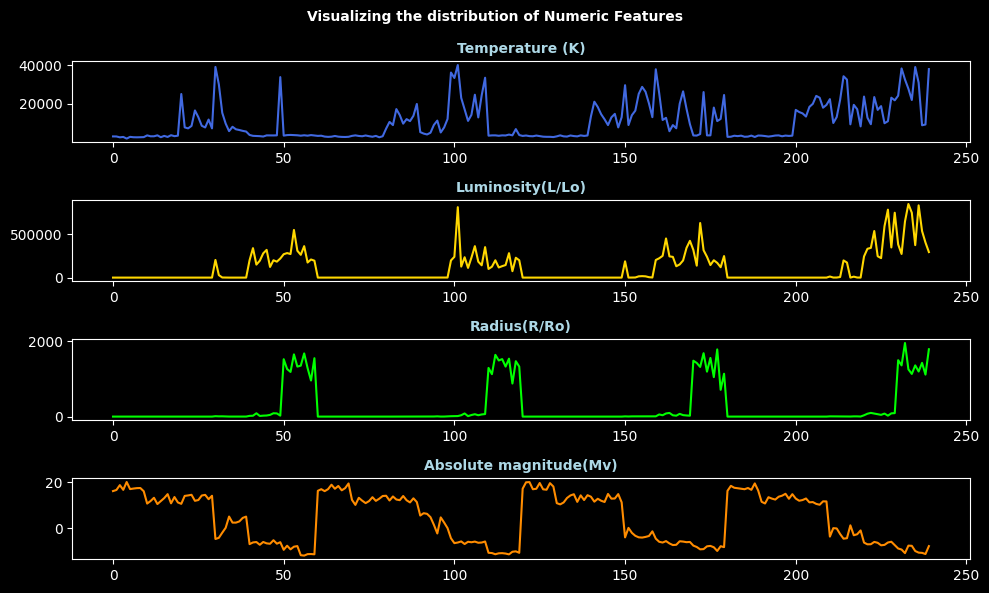

In [ ]:
# line plot

plt.figure(figsize=(10,6))
colors = ['royalblue','gold','lime','darkorange']
plt.suptitle('Visualizing the distribution of Numeric Features',
             color='white',
             weight='bold',
             fontsize='10')
for i in range(4):
    line_subplot(star_df,colors,i)

plt.tight_layout()
plt.savefig(base_dir + 'line_plot.png')

In [ ]:
# Pair Plot
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir + 'pair_plot.png')
plt.show()

In [42]:
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size':30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size':35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size':40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size':30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size':100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size':150, 'marker': 'o'}
}

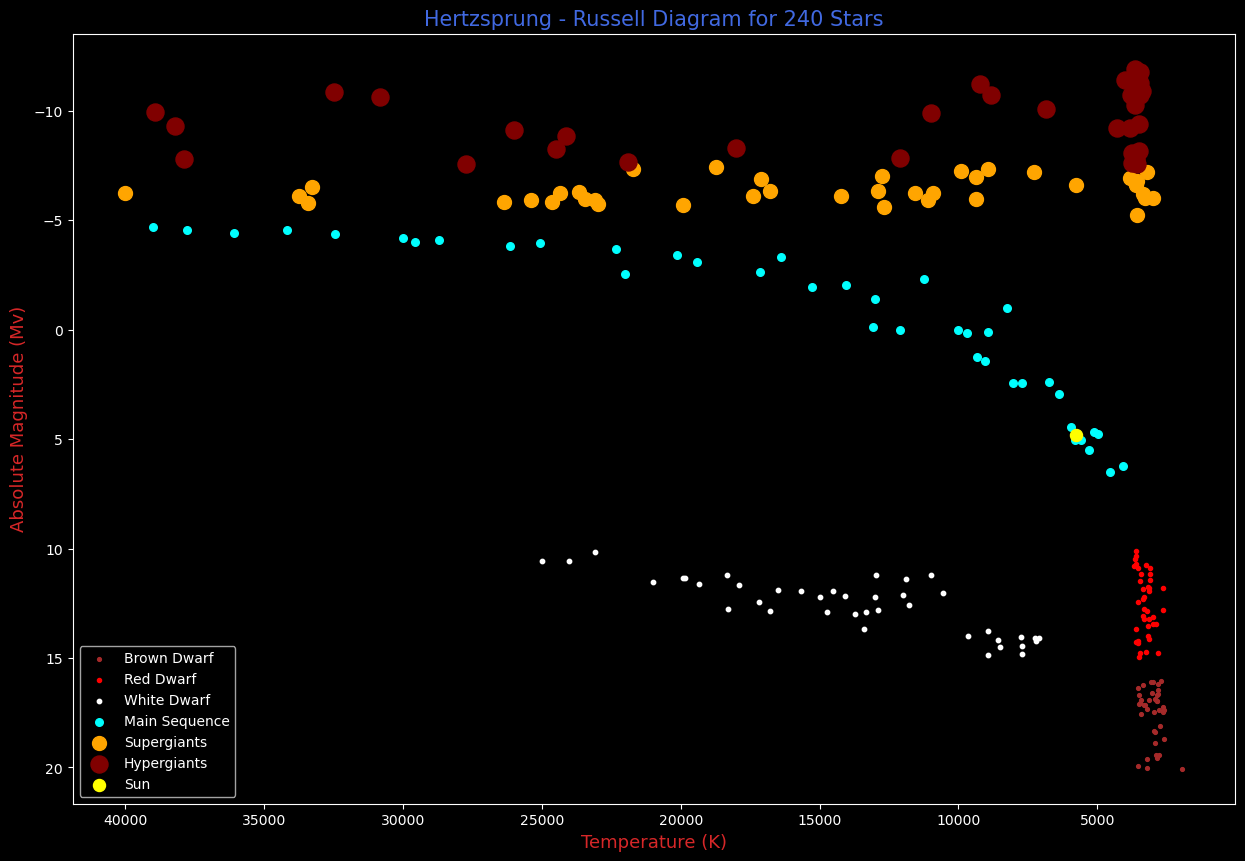

In [43]:
# HR Diagram

axes=[]
labels = set()

plt.figure(figsize=(15,10))

for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    
    if properties['label'] not in labels:
        ax = plt.scatter(temperature[i],abs_mag[i],
                        s=properties['size'],
                        c=properties['color'],
                        marker=properties['marker'],
                        label=properties['label'])
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temperature[i],abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
        
# Adding sun for comparison
ax_sun = plt.scatter(5778,4.83,s=75,c="yellow", marker='o', label='Sun')
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')


plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:red')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:red')

plt.legend(handles=axes)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.savefig(base_dir+'hr_diagram.png')

plt.show()
